In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from collections import *

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,C1,Duración_(min)_pl,Intensidad_media pl,Intensidad_máxima_pl,Intensidad_continuap_pl,C_(mm_est,Duración_(min)_esta,Intensidad_media_est,Intensidad_máxima_est,...,Hs_80,Hs_100,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,Qmax,Trespuesta_(min)_plub,Trespuesta_est,Q_inicial
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,105.0,100.0,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,115.0,125.0,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,105.0,105.0,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,70.0,65.0,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,75.0,80.0,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,320.0,325.0,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,75.0,80.0,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,55.0,60.0,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,45.0,50.0,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,80.0,85.0,14.355421


In [3]:
logqmax = np.log(datos[["Qmax"]])
logqmax.head()

,Qmax
0,2.847599
1,3.009655
2,3.423205
3,2.751324
4,2.827905


In [4]:
log_expl_var = pd.DataFrame(np.log(datos[["C_(mm_est", 'Lluvia_antecedent_48_horas_est']]))
log_expl_var.head()


,C_(mm_est,Lluvia_antecedent_48_horas_est
0,2.538447,2.595255
1,2.694627,3.916015
2,3.850148,3.916015
3,2.517696,0.000000
4,1.609438,3.927896


In [5]:
train_sizes = [10, 50, 70, 90, 100,125,150,170,190,200]

In [6]:
features = ['C_(mm_est', 'Lluvia_antecedent_48_horas_est']
target = 'Qmax'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = log_expl_var[features],
y = logqmax[target], train_sizes = train_sizes, cv = 100,
scoring = 'neg_mean_squared_error')

In [7]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.04945781 -0.05476113 -0.03634991 -0.03677549 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993 -0.02682993
  -0.02682993 -0.02

In [8]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10     0.027530
50     0.096761
70     0.105704
90     0.116101
100    0.116947
125    0.144927
150    0.157320
170    0.159879
190    0.152629
200    0.153457
dtype: float64

 --------------------

Mean validation scores

 10     0.228211
50     0.194852
70     0.185080
90     0.207890
100    0.199694
125    0.172031
150    0.167937
170    0.169561
190    0.166889
200    0.167884
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


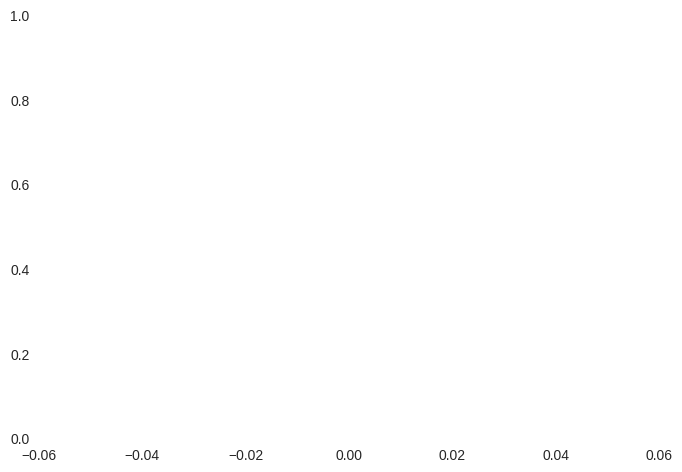

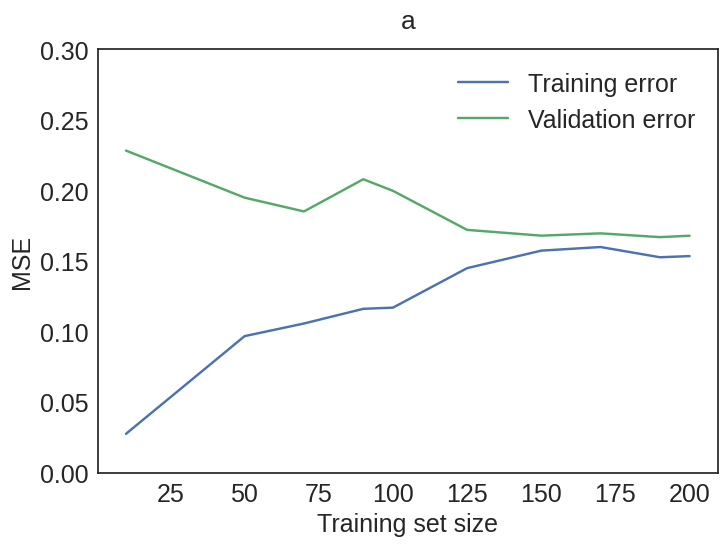

In [9]:
plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')    
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 18)
plt.xlabel('Training set size', fontsize = 18)
plt.title('a', fontsize = 19, y = 1.03)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.ylim(0,0.3)
plt.savefig("learning_curve_linear_regresion2.jpg", dpi = 300)

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


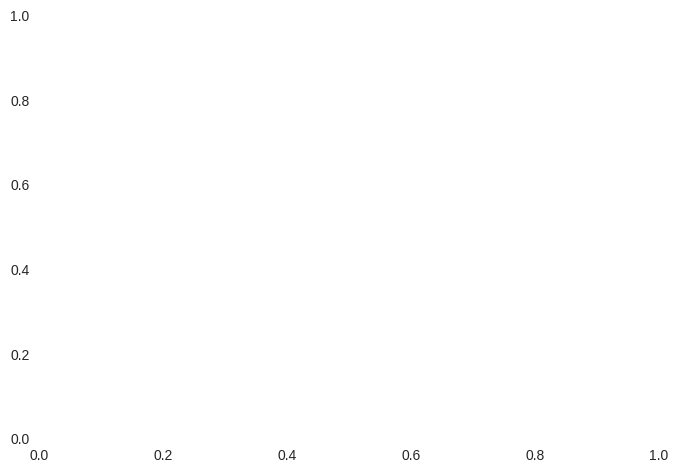

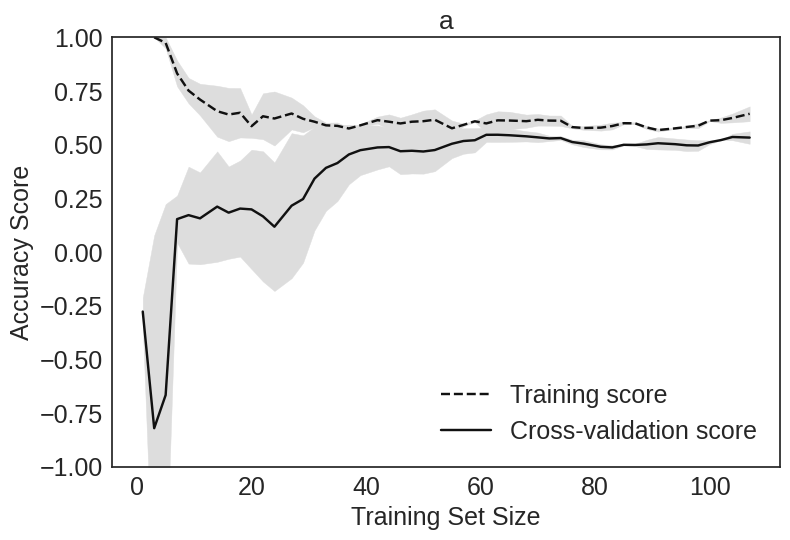

In [10]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), log_expl_var , logqmax,cv=2, scoring='r2', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

ax = plt.axes()
ax.set_facecolor("white")
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')    

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("a", fontsize = 19)
plt.xlabel("Training Set Size", fontsize = 18), plt.ylabel("Accuracy Score", fontsize = 18), plt.legend(loc="best", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("bias-variance_.jpg", dpi = 500)

In [11]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = LinearRegression()
results = cross_val_score(model, log_expl_var ,logqmax, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[0.64013129 0.66346329 0.67985393 0.68689997 0.71304611 0.64749039
 0.63317786 0.59238778 0.62361276 0.56868654 0.70680665 0.64535544
 0.69835843 0.61627612 0.72068324 0.56384752 0.74468747 0.73622318
 0.62176063 0.54275142 0.50844899 0.65430334 0.5626947  0.60477263
 0.76682979 0.75088871 0.59813678 0.65273685 0.62638918 0.65915161]
0.6476617535305569
0.06376800313308807


In [12]:
X_train,X_test, y_train,y_test = train_test_split(log_expl_var,logqmax, random_state=1)
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6496939232974134
Test score: 0.6714112058948771


In [14]:
lc = learning_curve(LinearRegression(),X_train,y_train,cv=2)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 8, 26, 44, 62, 80]),
 array([[0.56030175, 0.64198909],
        [0.34564424, 0.7395395 ],
        [0.54446055, 0.69177978],
        [0.65357394, 0.71031794],
        [0.65460919, 0.64952868]]),
 array([[0.10909151, 0.62993547],
        [0.56143665, 0.61141826],
        [0.61914499, 0.62831167],
        [0.63222353, 0.62866765],
        [0.63483897, 0.63476457]]))

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


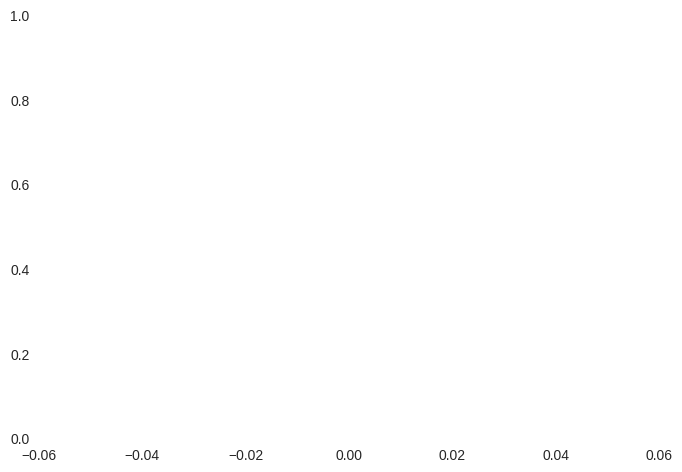

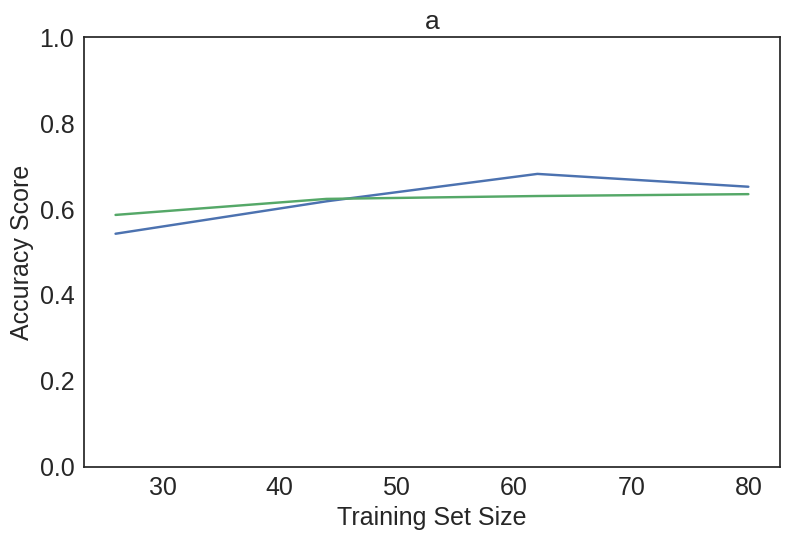

In [15]:

ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')   
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);
plt.ylim(0,1)
plt.title("a", fontsize = 19)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel("Training Set Size", fontsize =18), plt.ylabel("Accuracy Score", fontsize=18), 
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("overfitting_Linear_regression_.jpg", dpi = 500)

In [16]:
logqmax.to_excel("logqmax.xlsx")
log_expl_var.to_excel("log_expl_var.xlsx")